<a href="https://colab.research.google.com/github/mikeyy1996/Playing-with-Data/blob/master/AnalyticsVidya_JuntaHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.

------------------------------------------------------------------------

#AIM

We need to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.

------------------------------------------------------------------------

This notebook is structured as follows:

1. **Data Analysis** : In this section, we explore the dataset by taking a look at the feature distributions, how correlated one feature is to the other. 
2. **Feature Engineering,Categorical Encoding and Data Balancing** : Conduct some feature engineering as well as encode all our categorical features into dummy variables
3. **Implementing Machine Learning models** : Implement machine learning models for predictions

# Data Analysis

**In this section we will take a look at train and test data, find relations between features and labels,handle missing values and try to create a balanced dataset**

In [0]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing,model_selection

In [0]:
#reading data into dfs
data = pd.read_csv("/train.csv")
data_test = pd.read_csv("/test.csv")
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [0]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [0]:
print(data.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64



**Observations**


*   Our label will be 'Target'
*   We have 10 categorical features which will be needed to converted into numerical through encoding.


*   Lots of columns have null values as well. We need to impute the values.








**Let us now perform Chi-square to see relationship of categorical features with label.We will take the p-value as the estimate**

In [0]:
columns = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','last_new_job','company_size','company_type']
for col in columns:
  cont = pd.crosstab(data['target'],data[col])
  chi_val = stats.chi2_contingency(cont)
  print('p-value for:',col,chi_val[1])

p-value for: city 3.855216727610617e-64
p-value for: gender 0.009638527670809707
p-value for: relevent_experience 1.3267956813314173e-23
p-value for: enrolled_university 1.7789332654895568e-28
p-value for: education_level 7.262842220434136e-06
p-value for: major_discipline 0.2155392686100149
p-value for: experience 1.965820323112401e-30
p-value for: last_new_job 0.0009590216415931114
p-value for: company_size 0.019162917486512995
p-value for: company_type 6.953189749635574e-05


*Considering confidence interval to be 0.1; we can see major_discipline and company_size does not make for a good candidate.Also they have a lot of NULL values. Hence we will be dropping them.*

In [0]:
data = data.drop(['major_discipline','company_size'],axis = 'columns')
data_test = data_test.drop(['major_discipline','company_size'],axis = 'columns')


#Feature Engineering,Categorical Encoding and Data Balancing





In [0]:
print(data.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
experience                  59
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64



 **Gender, enrolled_university, education_level,experience,company_type ,last_new_job has missing values**

*We will be imputing the values using for different features with different methods.These are:*

*   Imputing by mode
*   Imputing by creating categorical bundles and assigning numerical values

We will also be performing one-hot encoding to convert the categoricl features into numerical


In [0]:
data['experience'].fillna("1",inplace = True)
data_test['experience'].fillna("1",inplace = True)

In [0]:
data['gender'].fillna('Male',inplace = True)
dummies_gender = pd.get_dummies(data['gender'])

data_test['gender'].fillna('Male',inplace = True)
dummies_gender_test = pd.get_dummies(data_test['gender'])


In [0]:
data['relevent_experience'].fillna('Has relevent experience',inplace = True)
dummies_relexp = pd.get_dummies(data['relevent_experience'])

data_test['relevent_experience'].fillna('Has relevent experience',inplace = True)
dummies_relexp_test = pd.get_dummies(data_test['relevent_experience'])



In [0]:
data['enrolled_university'].fillna('no_enrollment',inplace = True)
dummies_enruniv = pd.get_dummies(data['enrolled_university'])

data_test['enrolled_university'].fillna('no_enrollment',inplace = True)
dummies_enruniv_test = pd.get_dummies(data_test['enrolled_university'])

In [0]:
data['education_level'].fillna('Graduate',inplace = True)
dummies_edlevel = pd.get_dummies(data['education_level'])

data_test['education_level'].fillna('Graduate',inplace = True)
dummies_edlevel_test = pd.get_dummies(data_test['education_level'])

In [0]:
data['last_new_job'].fillna(1,inplace = True)
dummies_lastjob = pd.get_dummies(data['last_new_job'],prefix = 'last_')

data_test['last_new_job'].fillna(1,inplace = True)
dummies_lastjob_test = pd.get_dummies(data_test['last_new_job'],prefix = 'last_')

In [0]:
data['experience'].replace({"1":1,"2":1,"3":0,"4":0,"19":0,"20":0,">20":0,"<1":1,"5":0,"6":0,"7":0,"8":0,"9":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0},inplace = True)
data_test['experience'].replace({"1":1,"2":1,"3":0,"4":0,"19":0,"20":0,">20":0,"<1":1,"5":0,"6":0,"7":0,"8":0,"9":0,"10":0,"11":0,"12":0,"13":0,"14":0,"15":0,"16":0,"17":0,"18":0},inplace = True)


In [0]:
data['company_type'].fillna('Pvt Ltd',inplace = True)
dummies_ctype = pd.get_dummies(data['company_type'])

data_test['company_type'].fillna('Pvt Ltd',inplace = True)
dummies_ctype_test = pd.get_dummies(data_test['company_type'])

In [0]:
merged = pd.concat([data,dummies_gender,dummies_relexp,dummies_enruniv,dummies_edlevel,dummies_ctype,dummies_lastjob],axis = 'columns')
data = merged.drop(['city','gender','relevent_experience','enrolled_university','education_level','company_type','last_new_job'],axis = 'columns')

merged_test = pd.concat([data_test,dummies_gender_test,dummies_relexp_test,dummies_enruniv_test,dummies_edlevel_test,dummies_ctype_test,dummies_lastjob_test],axis = 'columns')
data_test = merged_test.drop(['city','gender','relevent_experience','enrolled_university','education_level','company_type','last_new_job'],axis = 'columns')



In [0]:
data.head()

,enrollee_id,city_development_index,experience,training_hours,target,Female,Male,Other,Has relevent experience,No relevent experience,Full time course,Part time course,no_enrollment,Graduate,High School,Masters,Phd,Primary School,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,last__1,last__1,last__2,last__3,last__4,last__>4,last__never
0,23798,0.689,0,106,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,29166,0.923,0,69,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,46,0.910,0,4,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,18527,0.666,0,26,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,21751,0.887,0,88,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [0]:
data_test.head()

,enrollee_id,city_development_index,experience,training_hours,Female,Male,Other,Has relevent experience,No relevent experience,Full time course,Part time course,no_enrollment,Graduate,High School,Masters,Phd,Primary School,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,last__1,last__1,last__2,last__3,last__4,last__>4,last__never
0,16548,0.448,1,15,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,12036,0.939,0,94,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,11061,0.920,0,17,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,5032,0.924,0,76,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,17599,0.830,0,65,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [0]:

col_list = data.columns[1:]
col_list_test = data_test.columns[1:]

col = col_list.to_list()
col_test = col_list_test.to_list()
print(col,col_test)

['city_development_index', 'experience', 'training_hours', 'target', 'Female', 'Male', 'Other', 'Has relevent experience', 'No relevent experience', 'Full time course', 'Part time course', 'no_enrollment', 'Graduate', 'High School', 'Masters', 'Phd', 'Primary School', 'Early Stage Startup', 'Funded Startup', 'NGO', 'Other', 'Public Sector', 'Pvt Ltd', 'last__1', 'last__1', 'last__2', 'last__3', 'last__4', 'last__>4', 'last__never'] ['city_development_index', 'experience', 'training_hours', 'Female', 'Male', 'Other', 'Has relevent experience', 'No relevent experience', 'Full time course', 'Part time course', 'no_enrollment', 'Graduate', 'High School', 'Masters', 'Phd', 'Primary School', 'Early Stage Startup', 'Funded Startup', 'NGO', 'Other', 'Public Sector', 'Pvt Ltd', 'last__1', 'last__1', 'last__2', 'last__3', 'last__4', 'last__>4', 'last__never']


In [0]:

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data[col] = scaler.fit_transform(data[col])
data = pd.DataFrame(data)
col.insert(0,'enrollee_id')
data.columns = col

data_test[col_test] = scaler.fit_transform(data_test[col_test])
data_test = pd.DataFrame(data_test)
col_test.insert(0,'enrollee_id')
data_test.columns = col_test

In [0]:
data.head()

,enrollee_id,city_development_index,experience,training_hours,target,Female,Male,Other,Has relevent experience,No relevent experience,Full time course,Part time course,no_enrollment,Graduate,High School,Masters,Phd,Primary School,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,last__1,last__1,last__2,last__3,last__4,last__>4,last__never
0,23798,0.481038,0.0,0.313433,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,29166,0.948104,0.0,0.202985,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,46,0.922156,0.0,0.008955,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,18527,0.435130,0.0,0.074627,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,21751,0.876248,0.0,0.259701,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Let us look for imbalance in our dataset. We will calculate the unique count of label categories in the dataset **

In [0]:
print("target data:",data['target'].value_counts())


target data: 0.0    15934
1.0     2425
Name: target, dtype: int64


*Clearly there is a lot of imbalance between categories, which may cause biasing in the models. There is a need to balance the dataset.
We will use upsampling of minority class*

In [0]:
from sklearn.utils import resample
df_majority = data[data.target==0]
df_minority = data[data.target==1]
print(df_majority,df_minority)
# Upsample minority class

 

       enrollee_id  city_development_index  ...  last__>4  last__never
0            23798                0.481038  ...       0.0          0.0
1            29166                0.948104  ...       0.0          0.0
2               46                0.922156  ...       0.0          0.0
3            18527                0.435130  ...       0.0          0.0
5            13342                0.351297  ...       0.0          0.0
...            ...                     ...  ...       ...          ...
18354        25366                0.942116  ...       0.0          0.0
18355        25545                0.942116  ...       0.0          0.0
18356        11514                0.954092  ...       0.0          0.0
18357         1689                0.980040  ...       0.0          0.0
18358         5995                0.690619  ...       0.0          0.0

[15934 rows x 31 columns]        enrollee_id  city_development_index  ...  last__>4  last__never
4            21751                0.876248  ...   

In [0]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15934,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31868 entries, 0 to 17796
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   enrollee_id              31868 non-null  int64  
 1   city_development_index   31868 non-null  float64
 2   experience               31868 non-null  float64
 3   training_hours           31868 non-null  float64
 4   target                   31868 non-null  float64
 5   Female                   31868 non-null  float64
 6   Male                     31868 non-null  float64
 7   Other                    31868 non-null  float64
 8   Has relevent experience  31868 non-null  float64
 9   No relevent experience   31868 non-null  float64
 10  Full time course         31868 non-null  float64
 11  Part time course         31868 non-null  float64
 12  no_enrollment            31868 non-null  float64
 13  Graduate                 31868 non-null  float64
 14  High School           

**Now that our analysis is complete and dataset is balanced, let us move to the next step**

# Implementing Machine Learning models

*Since the parameter on which scores will be decided is roc_auc_score we will also rate the models on the same*

In [0]:
from sklearn.model_selection import train_test_split
x = data.drop(['enrollee_id','target','last__1'], axis = 'columns')

y = data['target']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2,random_state = 42,stratify = y)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(25494, 27) (25494,)
(6374, 27) (6374,)


In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr = LogisticRegression(C=0.001,random_state = 0)
lr.fit(x_train,y_train)

lr_probs = lr.predict_proba(x_val)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_val, lr_probs)

lr_auc


0.616129674118332

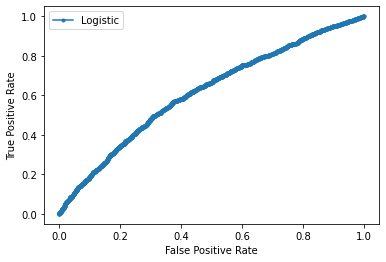

In [0]:
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

In [0]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 1,random_state = 0)
rf.fit(x_train,y_train)

rf_probs = rf.predict_proba(x_val)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_val, rf_probs)

rf_auc

0.9759495180107373

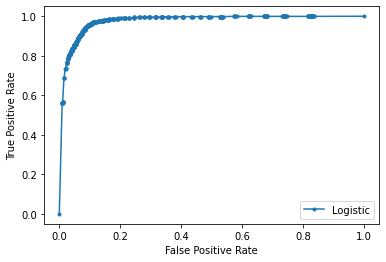

In [0]:
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_probs = dt.predict_proba(x_val)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(y_val, dt_probs)

dt_auc

0.9151056284606165

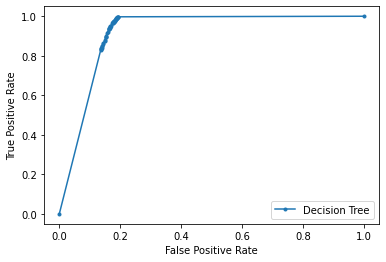

In [0]:
dt_fpr, dt_tpr, _ = roc_curve(y_val, dt_probs)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.55)
bnb.fit(x_train,y_train)
bnb_probs = bnb.predict_proba(x_val)
bnb_probs = bnb_probs[:, 1]
bnb_auc = roc_auc_score(y_val, bnb_probs)

bnb_auc

0.611417786152542

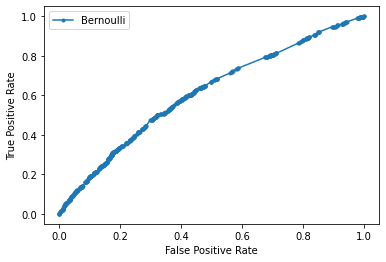

In [0]:
bnb_fpr, bnb_tpr, _ = roc_curve(y_val, bnb_probs)
plt.plot(bnb_fpr, bnb_tpr, marker='.', label='Bernoulli')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
from sklearn.svm import SVC
svc = SVC(probability=True,tol = 0.01)
svc.fit(x_train,y_train)
svc_probs = svc.predict_proba(x_val)
svc_probs = svc_probs[:, 1]
svc_auc = roc_auc_score(y_val, svc_probs)

svc_auc

0.6570174625914482

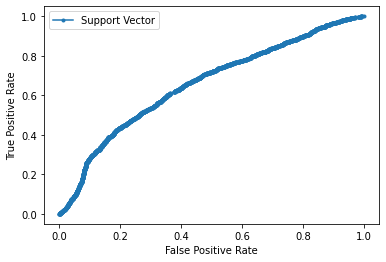

In [0]:
svc_fpr, svc_tpr, _ = roc_curve(y_val, svc_probs)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [0]:
from sklearn.neural_network import MLPClassifier
p = MLPClassifier(random_state=42,
              max_iter=100,tol = 0.0001)
p.fit(x_train,y_train)
p_probs = p.predict_proba(x_val)
p_probs = p_probs[:, 1]
p_auc = roc_auc_score(y_val, p_probs)

p_auc

0.695669987768989

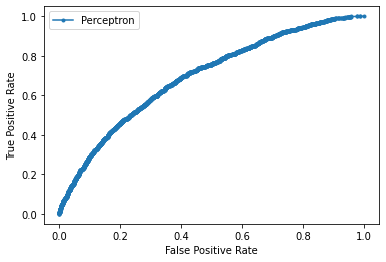

In [0]:
p_fpr, p_tpr, _ = roc_curve(y_val, p_probs)
plt.plot(p_fpr, p_tpr, marker='.', label='Perceptron')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Let's consolidate the  scores of each model**

In [0]:
auc_scores = [lr_auc,rf_auc,bnb_auc,svc_auc,dt_auc,p_auc]
models =['Logistic Regression','Random Forest','Bernoulli NaiveBayes','Support Vector','Decision Tree','MultiLayerPerceptron']
print("=====================ROC_AUC Scores=========================")
for score,model  in zip(auc_scores,models):
  print(model,": ",score)

=====================ROC_AUC Scores=========================
Logistic Regression :  0.616129674118332
Random Forest :  0.9759495180107373
Bernoulli NaiveBayes :  0.611417786152542
Support Vector :  0.6570174625914482
Decision Tree :  0.9151056284606165
MultiLayerPerceptron :  0.695669987768989


*RandomForest and DecisionTree have exceptionally high scores, this maybe because of overfitting*

Let us now predict our target and consolidate the final scores

# Predicting Test dataset


In [0]:
data_test.head()

,enrollee_id,city_development_index,experience,training_hours,Female,Male,Other,Has relevent experience,No relevent experience,Full time course,Part time course,no_enrollment,Graduate,High School,Masters,Phd,Primary School,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,last__1,last__1,last__2,last__3,last__4,last__>4,last__never
0,16548,0.000000,1.0,0.041791,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12036,0.980040,0.0,0.277612,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,11061,0.942116,0.0,0.047761,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5032,0.950100,0.0,0.223881,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,17599,0.762475,0.0,0.191045,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
x_test = data_test.drop(['enrollee_id','last__1'], axis = 'columns')

In [0]:
pred_lr = lr.predict(x_test)
unique_elements, counts_elements = np.unique(pred_lr, return_counts=True)
print(unique_elements,counts_elements)

[0. 1.] [9605 5416]


In [0]:
pred_rf = rf.predict(x_test)
unique_elements, counts_elements = np.unique(pred_rf, return_counts=True)
print(unique_elements,counts_elements)

[0. 1.] [12567  2454]


In [0]:
pred_dt = dt.predict(x_test)
unique_elements, counts_elements = np.unique(pred_dt, return_counts=True)
print(unique_elements,counts_elements)

[0. 1.] [12192  2829]


In [0]:
pred_svc = svc.predict(x_test)
unique_elements, counts_elements = np.unique(pred_svc, return_counts=True)
print(unique_elements,counts_elements)

[0. 1.] [9299 5722]


In [0]:
pred_bnb = bnb.predict(x_test)
unique_elements, counts_elements = np.unique(pred_bnb, return_counts=True)
print(unique_elements,counts_elements)

[0. 1.] [9386 5635]


In [0]:
pred_p = p.predict(x_test)
unique_elements, counts_elements = np.unique(pred_p, return_counts=True)
print(unique_elements,counts_elements)

[0. 1.] [9560 5461]


In [0]:
pd.DataFrame(pred_lr, columns=['target']).to_csv('/prediction_lr.csv')
pd.DataFrame(pred_xgb, columns=['target']).to_csv('/prediction_rf.csv')
pd.DataFrame(pred_dt, columns=['target']).to_csv('/prediction_dt.csv')
pd.DataFrame(pred_svc, columns=['target']).to_csv('/prediction_svc.csv')
pd.DataFrame(pred_bnb, columns=['target']).to_csv('/prediction_bnb.csv')
pd.DataFrame(pred_p, columns=['target']).to_csv('/prediction_p.csv')


In [0]:
auc_scores = [0.5957,0.5162,0.5950,0.6008,0.5168,0.6133]
models =['Logistic Regression','Random Forest','Bernoulli NaiveBayes','Support Vector','Decision Tree','MultiLayerPerceptron']
print("=====================Final Scores=========================")
for score,model  in zip(auc_scores,models):
  print(model,": ",score)

=====================Final Scores=========================
Logistic Regression :  0.5957
Random Forest :  0.5162
Bernoulli NaiveBayes :  0.595
Support Vector :  0.6008
Decision Tree :  0.5168
MultiLayerPerceptron :  0.6133


**As we assumed, the models with abnormally high score training(Random Forest,Decision Tree) performed the worst on test set. This is because of overfitting.**

Here is a link explaining what is overfitting and how it can be reduced:
[Overfit and Underfit in ML](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690)